In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read the metadata

In [2]:
df = pd.read_csv("../data/exams.csv")
df.head()

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5
1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5
2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5
3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5
4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5


## File with the most number of usable traces

Defined criteria:
1. normal_ecg = True
2. abs(age - nn_predicted_age) < 1

In [3]:
df[
    (df['normal_ecg']) &
    (abs(df['age'] - df['nn_predicted_age']) < 1)
    ]['trace_file'].value_counts()

trace_file
exams_part16.hdf5    772
exams_part15.hdf5    669
exams_part13.hdf5    640
exams_part0.hdf5     639
exams_part7.hdf5     634
exams_part3.hdf5     633
exams_part10.hdf5    632
exams_part5.hdf5     629
exams_part11.hdf5    628
exams_part14.hdf5    623
exams_part6.hdf5     617
exams_part8.hdf5     611
exams_part2.hdf5     610
exams_part1.hdf5     606
exams_part12.hdf5    599
exams_part9.hdf5     598
exams_part4.hdf5     590
exams_part17.hdf5    193
Name: count, dtype: int64

## saving ages of the sample from file num 16

In [4]:
age_data = df[
    (df['trace_file'] == 'exams_part16.hdf5') &
    (abs(df['nn_predicted_age'] - df['age']) <= 1.0) &
    (df['normal_ecg'])
]['age'].values

print(age_data.shape)
np.save('age_part16_abs_age_1.npy', age_data)


(772,)


In [5]:
df_16 = df[
    (df['trace_file'] == 'exams_part16.hdf5') &
    (abs(df['nn_predicted_age'] - df['age']) <= 1.0) &
    (df['normal_ecg'])
].reset_index(drop=True)
df_16.shape

(772, 15)

In [6]:
df_16.head()

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1683849,35,False,35.244183,False,False,False,False,False,False,1397534,NaN,NaN,True,exams_part16.hdf5
1,1754825,49,False,49.684593,False,False,False,False,False,False,959059,NaN,NaN,True,exams_part16.hdf5
2,1689108,41,False,40.222874,False,False,False,False,False,False,1500679,False,1.101369,True,exams_part16.hdf5
3,1715430,48,False,47.940437,False,False,False,False,False,False,1499416,NaN,NaN,True,exams_part16.hdf5
4,1796928,41,True,41.678860,False,False,False,False,False,False,673061,False,0.915068,True,exams_part16.hdf5


## To look at the traces, part of the file reconstruct.py needs to be run

Run eveything except the function `reconstruct_traces` from `reconstruct.py`

In [7]:
data = np.load("../output/p16/p16_age_diff_1_orig.npy")

In [8]:
data.shape

(772, 4096, 12)

In [9]:
data_0 = data[0, :, :]
data_0.shape

(4096, 12)

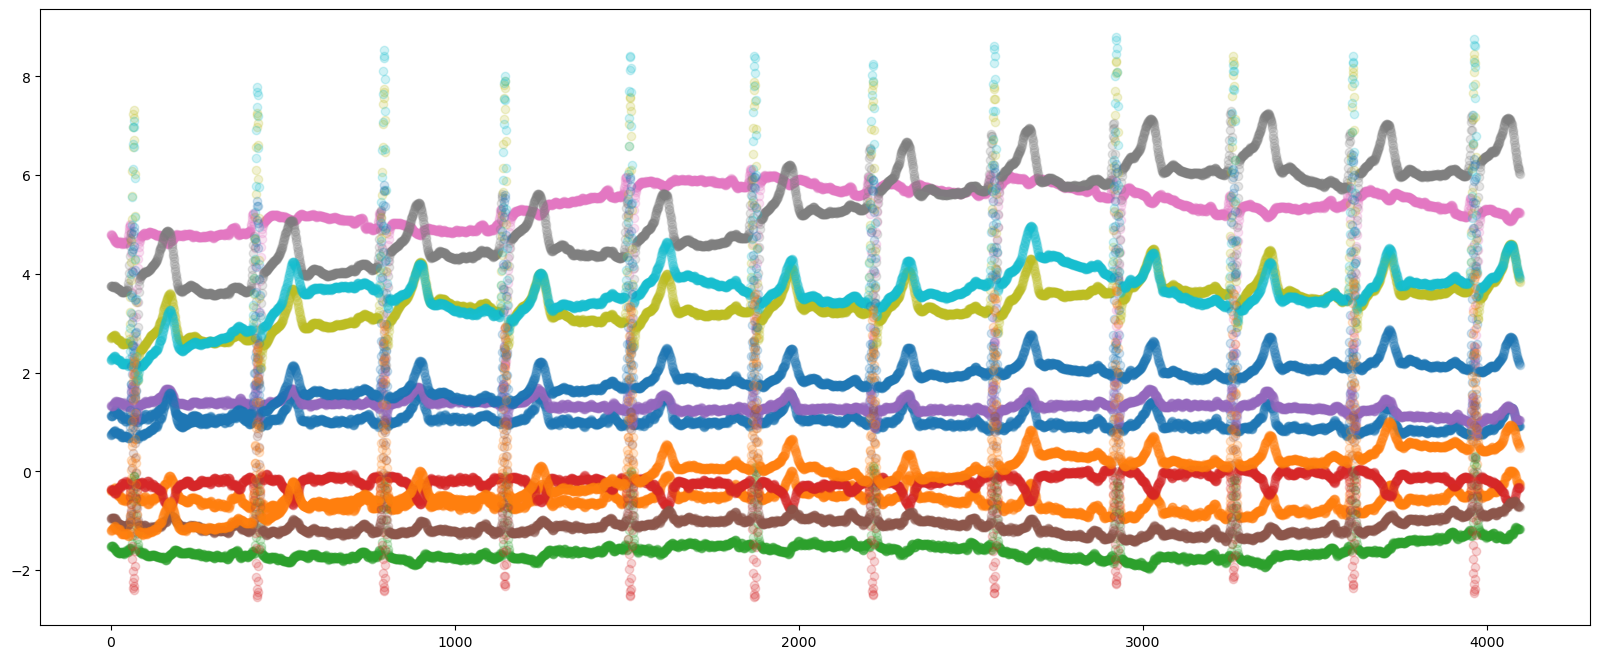

In [10]:
plt.figure(figsize=(20, 8))
for i in range(12):
    plt.scatter(range(4096), data_0[:, i], alpha=0.2)
# plt.savefig('plots/eid_1683849_original_trace.jpg', bbox_inches='tight')
plt.show()

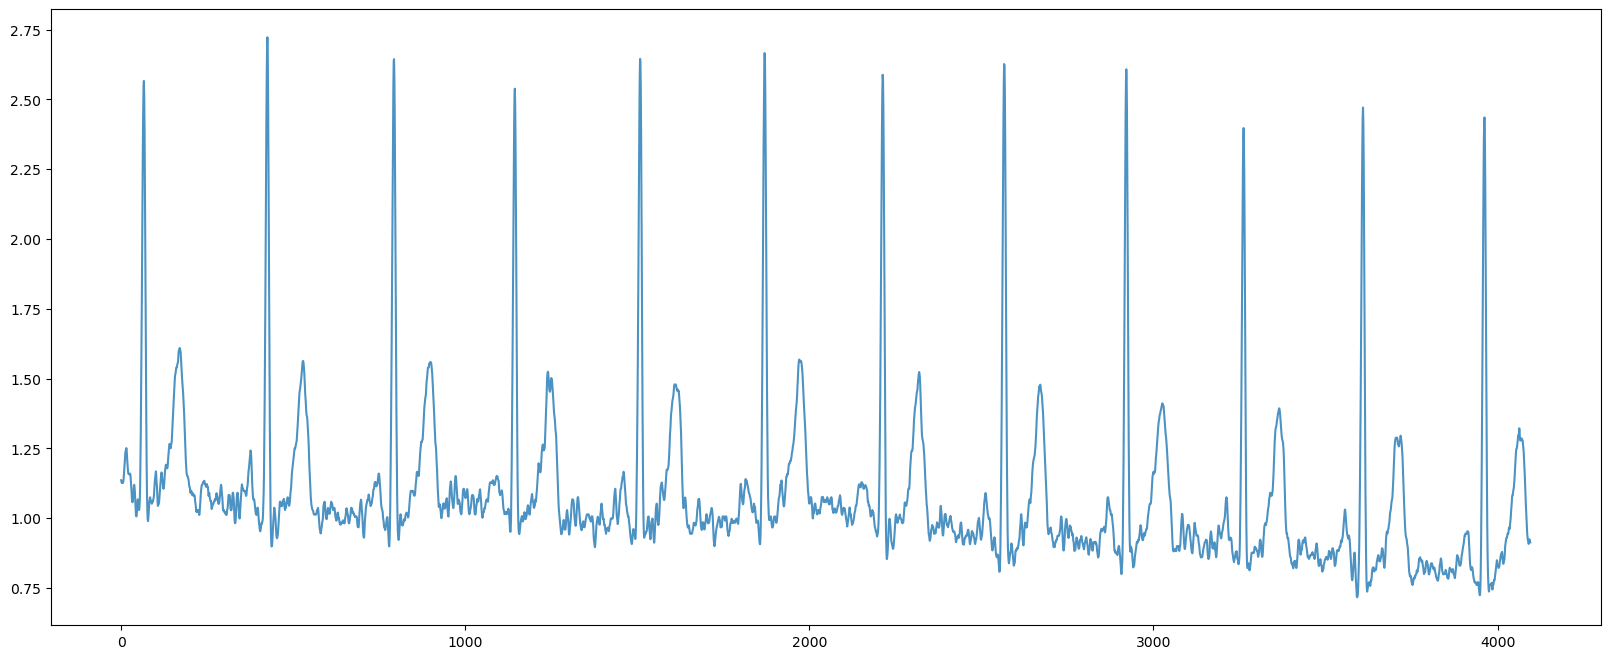

In [11]:
plt.figure(figsize=(20, 8))
for i in range(1):
    plt.plot(range(4096), data_0[:, i], alpha=0.8)


## Reading reconstructed "trace"

To create this file run `reconstruct.py`. Currently it may create a lot of reconstructed traces

In [12]:
xr = np.load('../output/p16/id_1683849_age_35_recon.npy')
xr.shape

(61, 4096, 12)

## if the shape of this array is 3-D, and then the first dimension may imply the recon traces is using ages 20-81

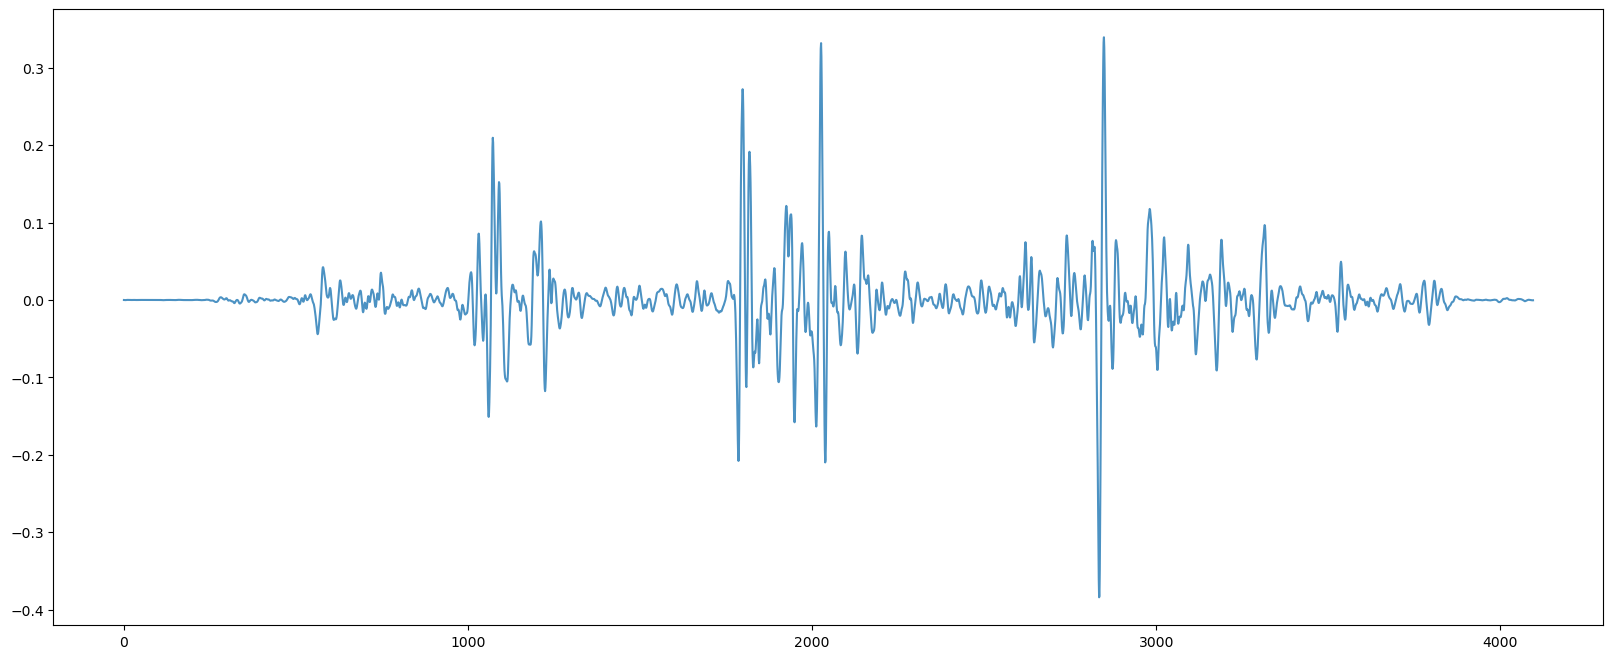

In [13]:
plt.figure(figsize=(20, 8))
n = 32 - 20
for i in range(1):
    plt.plot(xr[n, :, i], alpha=0.8)
# Using 35-20 to get the index of the reconstucted age with the exact reported chronological age

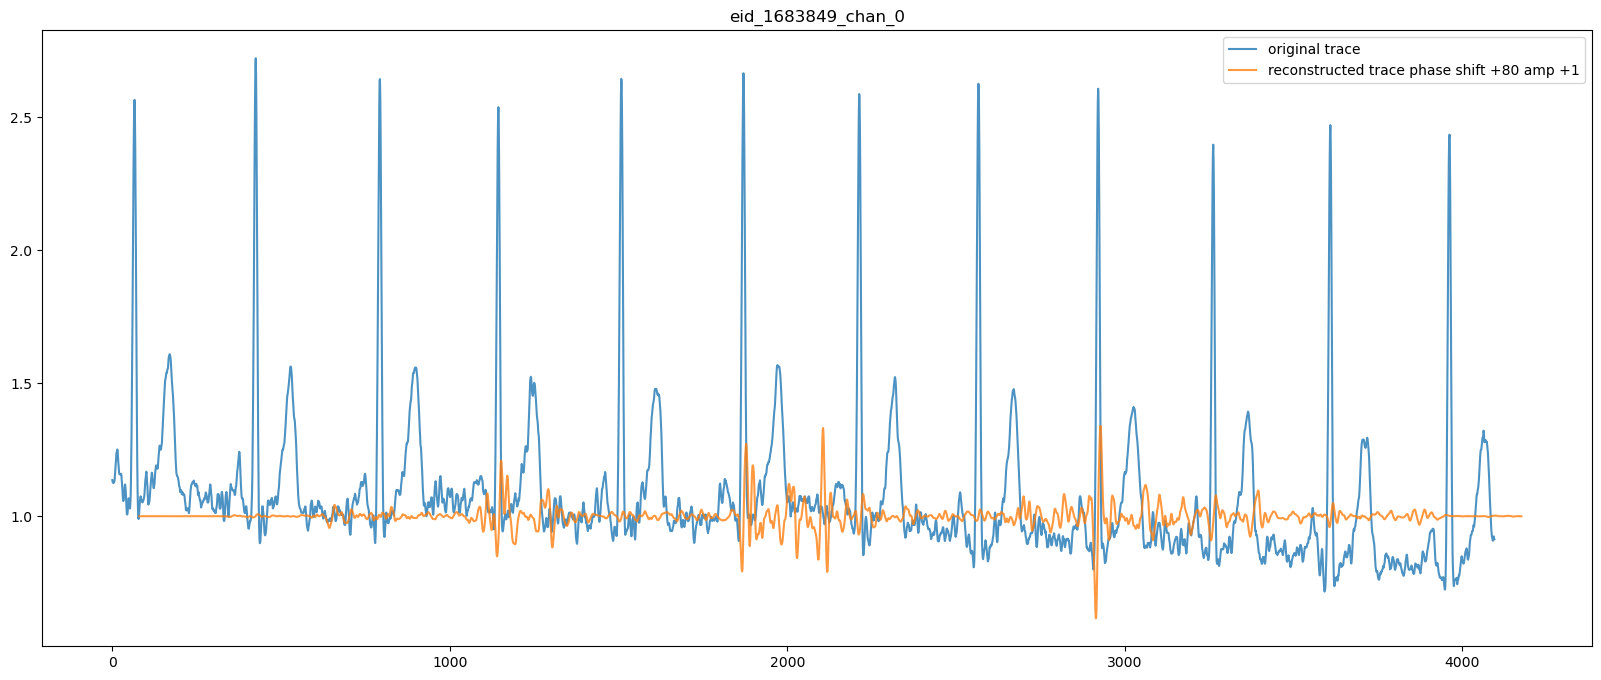

In [14]:
i = 0
plt.figure(figsize=(20, 8))
plt.plot(range(4096), (data[0, :, i]), alpha=0.8, label='original trace')
plt.plot([t+80 for t in range(4096)], xr[n, :, i] + 1, alpha=0.8, label='reconstructed trace phase shift +80 amp +1')
plt.title(f'eid_1683849_chan_{i}')
plt.legend()
plt.plot()
plt.show()

## All channels

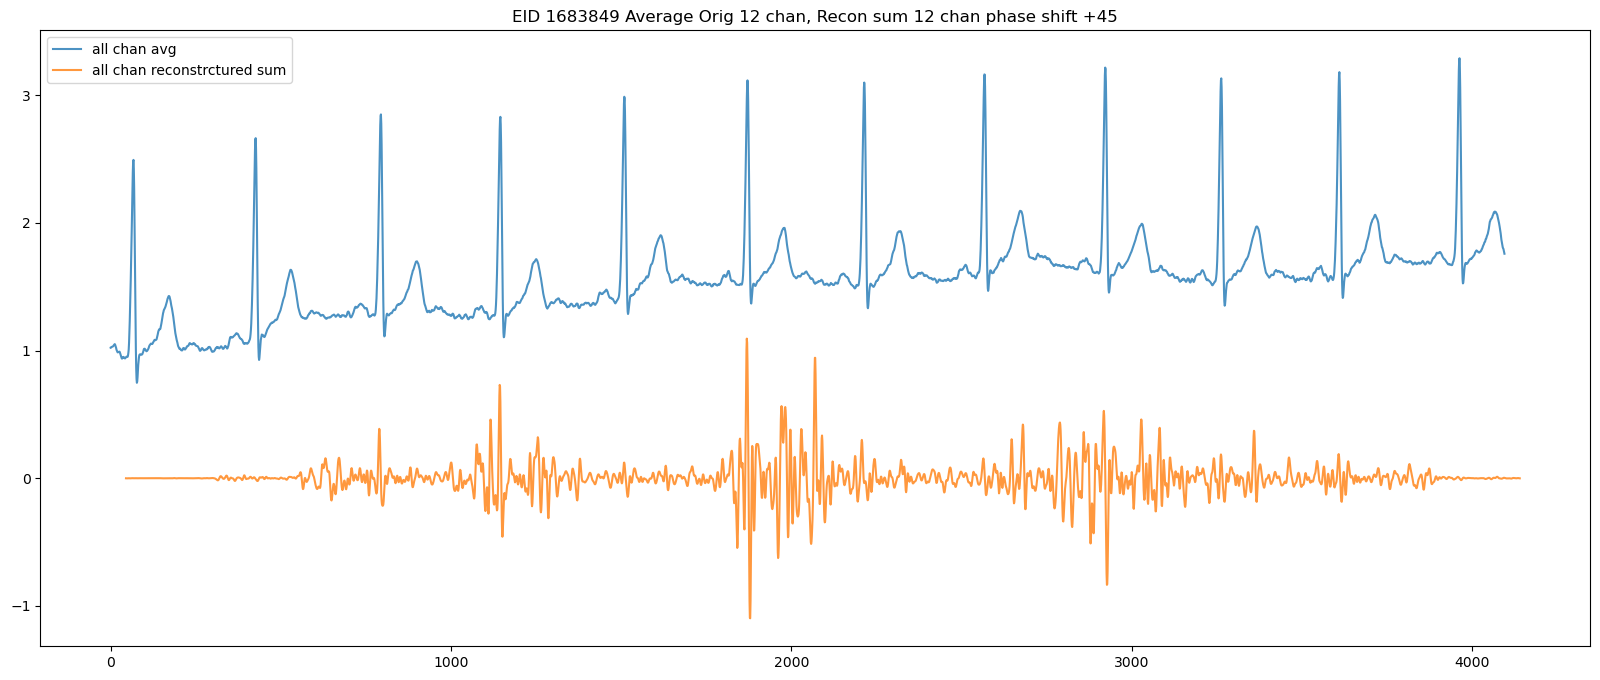

In [15]:
plt.figure(figsize=(20, 8))
plt.plot([t for t in range(4096)], (data[0, :, :].sum(axis=1))/12, alpha=0.8, label='all chan avg')
plt.plot([t + 45 for t in range(4096)], (xr[n, :, :].sum(axis=1)), alpha=0.8, label='all chan reconstrctured sum')
plt.title("EID 1683849 Average Orig 12 chan, Recon sum 12 chan phase shift +45")
plt.legend()
# plt.savefig('plots/eid_1683849_traces_orig_avg_recon_sum_phase_shift_45.jpg', bbox_inches='tight')

plt.plot()
plt.show()